<a href="https://colab.research.google.com/github/chimuka-e-sakala/code-unza25-csc4792-project_team_3-repository-for-Project-Team-3/blob/main/code_unza25_csc4792_project_team_3_notebook_ipynb_for_Project_Team_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1. BUSINESS UNDERSTANDING**  

## Problem Statement  
The University of Zambia *Journal of Agriculture and Biomedical Sciences* **(UNZA-JABS)** is a quarterly Journal open to journal article publication in the fields of **agriculture, medicine, veterinary medicine and biomedical sciences as well as such allied life sciences**. The Journal welcomes manuscripts submissions that meet the general criteria of significance and scientific excellence. Currently, the classification of submitted articles into these categories is performed manually by editors or reviewers, which introduces several challenges:  

- **Time-Consuming Process**: Manual categorization requires significant editorial effort, delaying publication timelines.  
- **Subjectivity and Human Error**: Different reviewers may classify the same article differently based on their expertise, leading to inconsistencies.  
- **Scalability Issues**: As the number of submissions grows, manual classification becomes unsustainable.  

To address these challenges, we propose developing an **automated machine learning (ML)-based classification system** that uses **article titles and abstracts** to predict the correct discipline. This system will improve efficiency, reduce bias, and enhance the journal’s ability to organize and index articles effectively.  

---


## Business Objectives  
The primary goal is to **automate and optimize the classification process** while ensuring high accuracy. Success from a real-world perspective would mean:  

### **Key Objectives:**  
**Reduce Editorial Workload** - Minimize the time and effort required for manual categorization.  
**Improve Classification Accuracy** - Achieve higher consistency than human-based classification.  
**Enhance Article Discoverability** - Ensure researchers can easily find articles in their field.  
**Support Scalability** - Handle increasing submission volumes without additional staffing.  

### **Stakeholder Benefits:**  
- **Editors & Reviewers**: Spend less time on administrative tasks and more on content evaluation.  
- **Researchers & Readers**: Quickly locate relevant articles due to accurate tagging.  
- **Journal Management**: Improve operational efficiency and reduce publication delays.  

---


## Data Mining Goals  
To achieve the business objectives, we will implement a **text classification model** using Natural Language Processing (NLP) and supervised learning. The key steps include:  

### **Step 1: Data Collection & Preprocessing**  
- **Dataset Acquisition**: Gather labeled journal articles (title + abstract + discipline) from past issues.  
- **Text Cleaning**:  
  - Remove special characters, numbers, and irrelevant formatting.  
  - Apply tokenization, stopword removal, and lemmatization (e.g., using NLTK or spaCy).  
- **Feature Extraction**:  
  - Bag-of-Words (BoW) / TF-IDF for traditional ML models.  
  - Word embeddings (Word2Vec, GloVe) or transformer-based embeddings (BERT, SciBERT) for deep learning models.  

### **Step 2: Model Development**  
We will experiment with multiple classification algorithms:  
- **Traditional ML Models**:  
  - Naïve Bayes (baseline for text classification)  
  - Support Vector Machines (SVM)  
  - Random Forest / XGBoost (with TF-IDF features)  
- **Deep Learning Models**:  
  - LSTM / BiLSTM for sequential text analysis  
  - Transformer-based models (e.g., BERT, DistilBERT for higher accuracy)  

### **Step 3: Model Evaluation & Optimization**  
- **Performance Metrics**:  
  - Accuracy, Precision, Recall, F1-Score (per class and macro-average).  
  - Confusion matrix to analyze misclassifications.  
- **Hyperparameter Tuning**:  
  - GridSearchCV / RandomSearch for traditional models.  
  - Learning rate scheduling for deep learning models.  
- **Explainability**:  
  - SHAP values / LIME to interpret model decisions.  
  - Key term extraction (e.g., most influential words for each category).  

### **Step 4: Deployment & Integration**  
- **API Development**: Wrap the best model in a REST API (Flask/FastAPI).  
- **Journal Submission System Integration**:  
  - Automatically suggest categories during manuscript submission.  
  - Allow editors to override predictions if needed.  

---


## Success Criteria
For the model to be considered successful, it must meet the following benchmarks:  

### **Performance Metrics:**  
**Accuracy ≥ 85%** (to ensure reliable automated classification).  
**Precision & Recall ≥ 80% per class** (to avoid bias toward any discipline).  
**Balanced F1-Score** (to ensure fairness across categories).  

### **Practical Deployment Requirements:**  
**Low Latency** - Predictions should take <1 second to avoid slowing submissions.  
**Scalability** - Model should handle thousands of submissions without performance drops.  
**Explainability** - Editors should understand why an article was classified a certain way.  

---


## Potential Challenges & Mitigation Strategies  
| **Challenge** | **Mitigation Strategy** |
|--------------|------------------------|
| **Class Imbalance** | Use oversampling (SMOTE) or class weights in training. |
| **Ambiguous Interdisciplinary Articles** | Introduce a "Hybrid/Interdisciplinary" category. |
| **Domain-Specific Terminology** | Use SciBERT/BioBERT instead of generic embeddings. |
| **Model Interpretability** | Apply SHAP/LIME for transparency in predictions. |

---



## Future Enhancements  
- **Multi-Label Classification** (for articles belonging to multiple fields).  
- **Active Learning** - Allow editors to correct misclassifications to improve the model iteratively.  
- **Trend Analysis** - Use classification data to track research trends over time.  

---



## Conclusion
This project will develop an **automated, accurate, and scalable classification system** for the *Journal of Agricultural and Biomedical Sciences*, reducing manual effort and improving consistency. By leveraging NLP and ML, we aim to enhance the journal’s operational efficiency and support researchers in accessing relevant content faster

# **2. DATA UNDERSTANDING**


We will start by importing the necessary libraries and loading our raw jabs dataset.

In [20]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import string
from datetime import datetime

# Download necessary NLTK data for text preprocessing
nltk.download('punkt_tab')
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize

# --- Load the Dataset ---
var_path_learning = "https://raw.githubusercontent.com/chimuka-e-sakala/code-unza25-csc4792-project_team_3-repository-for-Project-Team-3/refs/heads/main/jabs.csv"
var_raw_learning_outcomes_df = pd.read_csv(var_path_learning, sep=',')
print("Loaded dataset from github")

# We will work with a copy to keep the original raw data intact
var_working_df = var_raw_learning_outcomes_df.copy()

Loaded dataset from github


[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## Exploratory Data Analysis

In [21]:
var_working_df.head()

,title,author,abstract,discipline,date_of_publication
0,Comparison of Viral Load Suppression among HIV...,Mukumbi Mutenda; Derrick Munkombwe; Patrick Ka...,Abacavir is one of the first-line drugs used t...,General,6/1/2023
1,"Knowledge, Attitudes and Practices on Newcastl...",Chilufya N Muya; Esther Munanjala; Bernadette ...,Introduction: Newcastle disease is a viral dis...,Veterinary Medicine,7/5/2023
2,Effects of High-Intensity Aerobic Interval Tra...,Mikoloni Mary Musonda; Nkhata A Loveness; Goma...,Chronic heart failure patients present...,General,8/15/2023
3,Evaluation of Processing Methods for Increased...,Joseph Simbaya; M Mwape; Oswin C. Chibinga; Si...,This study aimed at evaluating the proces...,Agriculture Sciences,7/13/2023
4,Growth Performance of Kuroiler (Rhode Island R...,Francisco Kanyinji; Ketty Musukwa; Joseph Simb...,Aflatoxin contamination in feed and feed ingre...,Agriculture Sciences,8/4/2023


In [22]:
var_working_df.shape

(105, 5)

In [23]:
var_working_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   title                105 non-null    object
 1   author               105 non-null    object
 2   abstract             105 non-null    object
 3   discipline           105 non-null    object
 4   date_of_publication  105 non-null    object
dtypes: object(5)
memory usage: 4.2+ KB


In [24]:
var_working_df.describe(include='all')

,title,author,abstract,discipline,date_of_publication
count,105,105,105,105,105
unique,105,105,105,4,64
top,Comparison of Viral Load Suppression among HIV...,Mukumbi Mutenda; Derrick Munkombwe; Patrick Ka...,Abacavir is one of the first-line drugs used t...,Biomedical Sciences,3/31/2012
freq,1,1,1,42,10


In [25]:
var_working_df.isnull().sum()

,0
title,0
author,0
abstract,0
discipline,0
date_of_publication,0


In [26]:
var_working_df['discipline'].value_counts()

,count
discipline,
Biomedical Sciences,42
Agriculture Sciences,27
Veterinary Medicine,21
General,15


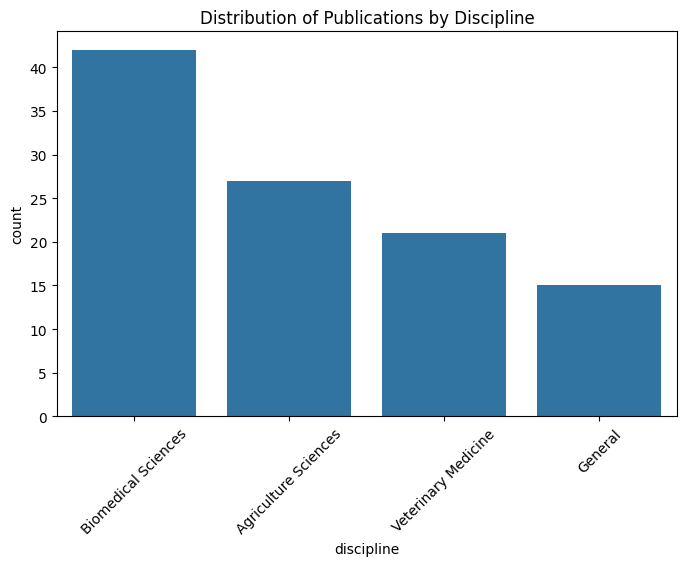

In [27]:
plt.figure(figsize=(8,5))
sns.countplot(data=var_working_df, x='discipline', order=var_working_df['discipline'].value_counts().index)
plt.title('Distribution of Publications by Discipline')
plt.xticks(rotation=45)
plt.show()

# **3. DATA PREPARATION**

## Data Selection Process

Goal: Reduce the dataset to only the features (columns) that are relevant to our modeling goal. Including irrelevant columns can add noise and complexity.


In [28]:
# Define the list of columns we believe are most relevant for our initial model
var_relevant_columns = [
    'title', 'author', 'discipline', 'date_of_publication'
]

# Select only these columns from the working DataFrame
var_selected_df = var_working_df[var_relevant_columns]

print("Data Selection Complete")
print(f"Original number of columns: {var_working_df.columns}")
print(f"Selected number of columns: {len(var_selected_df.columns)}")
var_selected_df.head(2).T

Data Selection Complete
Original number of columns: Index(['title', 'author', 'abstract', 'discipline', 'date_of_publication'], dtype='object')
Selected number of columns: 4


,0,1
title,Comparison of Viral Load Suppression among HIV...,"Knowledge, Attitudes and Practices on Newcastl..."
author,Mukumbi Mutenda; Derrick Munkombwe; Patrick Ka...,Chilufya N Muya; Esther Munanjala; Bernadette ...
discipline,General,Veterinary Medicine
date_of_publication,6/1/2023,7/5/2023


## Data Preprocessing

In [29]:
# Fill missing authors with 'Unknown'
var_working_df['author'] = var_working_df['author'].fillna('Unknown')

# Standardize text fields (lowercase and strip extra spaces)
for col in ['title', 'author', 'abstract', 'discipline']:
    var_working_df[col] = var_working_df[col].str.strip().str.lower()

# Convert publication date to datetime format
var_working_df['date_of_publication'] = pd.to_datetime(var_working_df['date_of_publication'], dayfirst=True, errors='coerce')

In [30]:
# Drop duplicate rows if any
var_working_df = var_working_df.drop_duplicates()

In [31]:
# Check for remaining null values
print(var_working_df.isnull().sum())

title                   0
author                  0
abstract                0
discipline              0
date_of_publication    70
dtype: int64


## Data Transformation

In [32]:
# Extract date components
var_working_df['pub_year'] = var_working_df['date_of_publication'].dt.year
var_working_df['pub_month'] = var_working_df['date_of_publication'].dt.month
var_working_df['pub_day'] = var_working_df['date_of_publication'].dt.day

In [33]:
# Encode discipline as categorical (label encoding)
var_working_df['discipline_encoded'] = var_working_df['discipline'].astype('category').cat.codes

## Feature Engineering

In [34]:
import re
from datetime import datetime

# Abstract length in words and characters
var_working_df['abstract_word_count'] = var_working_df['abstract'].apply(lambda x: len(str(x).split()))
var_working_df['abstract_char_count'] = var_working_df['abstract'].apply(lambda x: len(str(x)))

# Title keyword extraction (top word per title, simple)
var_working_df['title_keywords'] = var_working_df['title'].apply(lambda x: [word for word in re.findall(r'\b\w+\b', x) if len(word) > 4])

# Number of authors (splitting by comma)
var_working_df['author_count'] = var_working_df['author'].apply(lambda x: len(x.split(',')) if x != 'unknown' else 0)

# Publication recency (years since publication)
current_year = datetime.now().year
var_working_df['years_since_pub'] = current_year - var_working_df['pub_year']

Saved Processed Data

In [35]:
# Save cleaned and feature-engineered dataset
var_working_df.to_csv("/content/jabs_cleaned.csv", index=False)

# 4.MODELING

## Algorithm Selection

The goal is to automate classification of journal articles (titles + abstracts) into four disciplines: Biomedical Sciences, Agriculture Sciences, Veterinary Medicine, and General.

We’ll use Support Vector Machines (SVM) with TF-IDF features.

SVM is strong for text classification due to high-dimensional sparse data handling

We’ll split the processed dataset (jabs_cleaned.csv saved in mining) into training (80%) and testing (20%)

We’ll train the SVM classifier using TF-IDF features extracted from the article titles + abstracts


In [36]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

# Load the cleaned dataset (from mining step)
data = pd.read_csv("/content/jabs_cleaned.csv")

# Combine title and abstract as text input
data['text'] = data['title'].astype(str) + " " + data['abstract'].astype(str)

# Define features and target
X = data['text']
y = data['discipline']

In [37]:
# Split into training and testing sets (80/20 split)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [38]:
# Build pipeline: TF-IDF + SVM
model = Pipeline([
    ('tfidf', TfidfVectorizer(max_features=5000, ngram_range=(1,2))),

    ('svm', LinearSVC(random_state=42))
])

In [39]:
# Train the model
model.fit(X_train, y_train)

Pipeline(steps=[('tfidf',
                 TfidfVectorizer(max_features=5000, ngram_range=(1, 2))),
                ('svm', LinearSVC(random_state=42))])

In [42]:
# Evaluate on test set
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

                      precision    recall  f1-score   support

agriculture sciences       0.75      0.50      0.60         6
 biomedical sciences       0.58      0.88      0.70         8
             general       0.50      0.33      0.40         3
 veterinary medicine       0.67      0.50      0.57         4

            accuracy                           0.62        21
           macro avg       0.62      0.55      0.57        21
        weighted avg       0.63      0.62      0.60        21

